Load network from OSM

In [2]:
import osmnx as ox

place='Gipuzkoa, Spain'
G=ox.graph_from_place(place, network_type='drive')

Plot graph

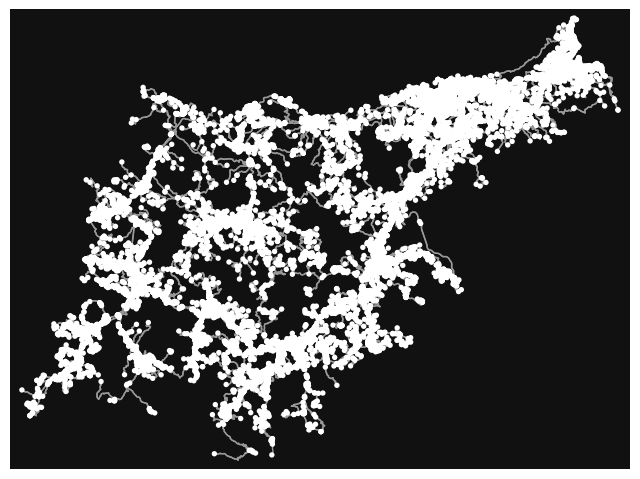

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G)

In [ ]:
# plot only the edges, not the nodes
ox.plot_graph(G, node_size=0)

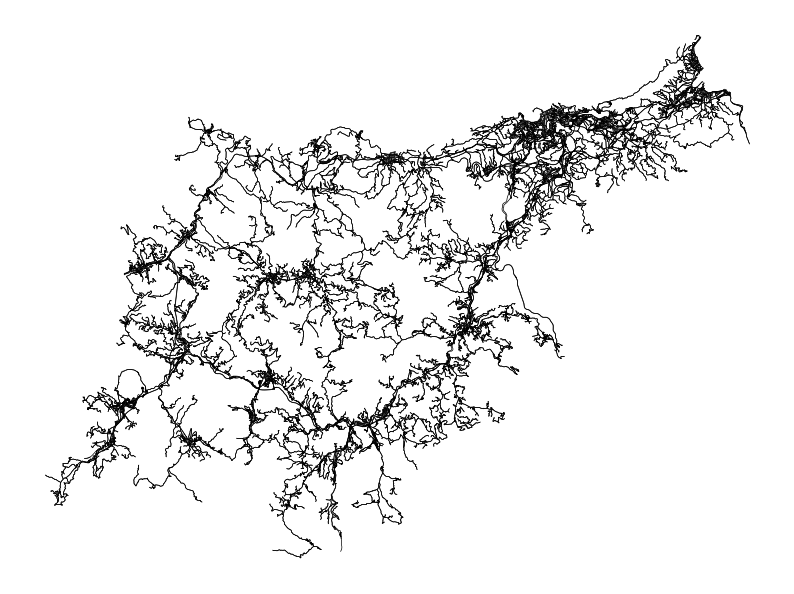

In [3]:
import matplotlib.pyplot as plt

# Extract edges as a GeoDataFrame
edges_gdf = ox.utils_graph.graph_to_gdfs(G, nodes=False, edges=True)

# Plot only the edges
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, linewidth=0.5, color="black")

# Remove axis for cleaner visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

In [ ]:
# extract nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

# save nodes and edges as separate GeoDataFrames to geojson
nodes.to_file("data/networks/drive_nodes.geojson", driver="GeoJSON")
edges.to_file("data/networks/drive_edges.geojson", driver="GeoJSON")

In [ ]:
ox.save_graphml(G, filepath ='data/networks/G_drive_network.graphml')

Same for bike and walk

In [4]:
G_walk=ox.graph_from_place(place, network_type='walk')

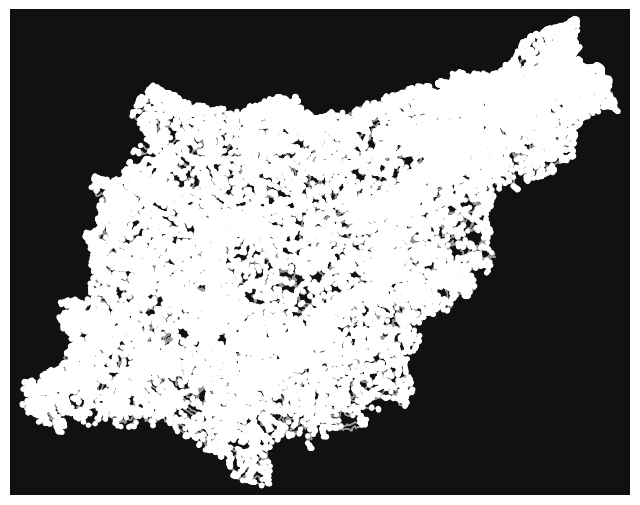

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(G_walk)

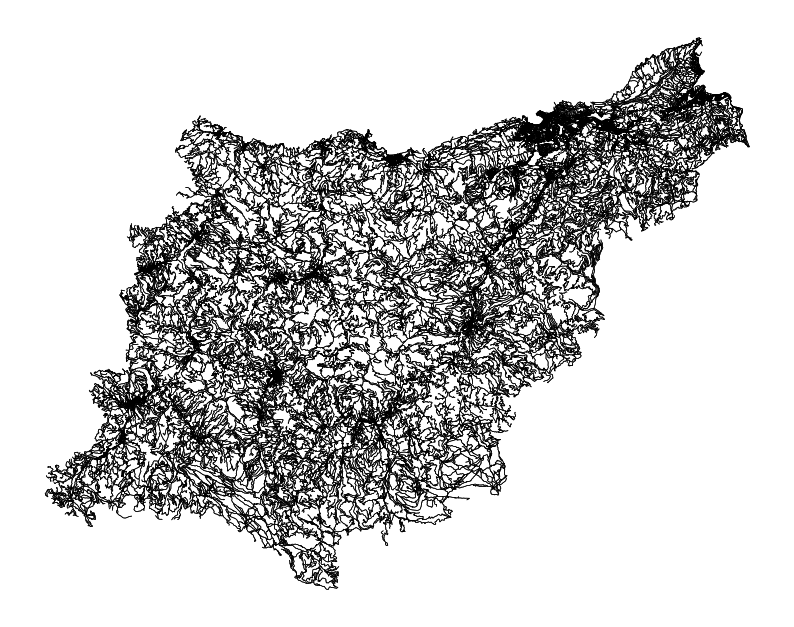

In [6]:
import matplotlib.pyplot as plt

# Extract edges as a GeoDataFrame
edges_walk_gdf = ox.utils_graph.graph_to_gdfs(G_walk, nodes=False, edges=True)

# Plot only the edges
fig, ax = plt.subplots(figsize=(10, 10))
edges_walk_gdf.plot(ax=ax, linewidth=0.5, color="black")

# Remove axis for cleaner visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

In [ ]:
# extract nodes and edges
nodes, edges = ox.graph_to_gdfs(G_walk)

# save nodes and edges as separate GeoDataFrames to geojson
nodes.to_file("data/networks/walk_nodes.geojson", driver="GeoJSON")
edges.to_file("data/networks/walk_edges.geojson", driver="GeoJSON")

In [ ]:
ox.save_graphml(G_walk, filepath ='data/networks/G_walk_network.graphml')

In [13]:
G_bike=ox.graph_from_place(place, network_type='bike')

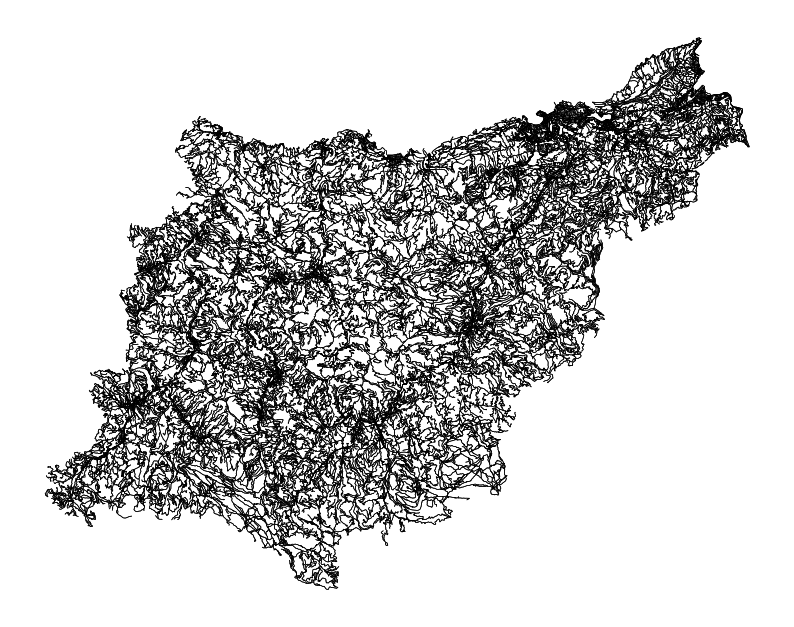

In [14]:
import matplotlib.pyplot as plt

# Extract edges as a GeoDataFrame
edges_bike_gdf = ox.utils_graph.graph_to_gdfs(G_bike, nodes=False, edges=True)

# Plot only the edges
fig, ax = plt.subplots(figsize=(10, 10))
edges_bike_gdf.plot(ax=ax, linewidth=0.5, color="black")

# Remove axis for cleaner visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

In [ ]:
# extract nodes and edges
nodes, edges = ox.graph_to_gdfs(G_bike)

# save nodes and edges as separate GeoDataFrames to geojson
nodes.to_file("data/networks/bike_nodes.geojson", driver="GeoJSON")
edges.to_file("data/networks/bike_edges.geojson", driver="GeoJSON")

In [ ]:
ox.save_graphml(G_bike, filepath ='data/networks/G_bike_network.graphml')

Check for missing geometry

In [28]:
missing_geometry_edges = []

# Loop through all edges in the graph
for u, v, key, data in G_bike.edges(keys=True, data=True):
    if 'geometry' not in data:
        missing_geometry_edges.append((u, v, key))

# Print the edges with missing geometry
print("Edges missing geometry:", missing_geometry_edges)

Edges missing geometry: [(451289, 5995473570, 0), (469499, 12453338700, 0), (469501, 55505547, 0), (469507, 25434145, 0), (470873, 298127661, 0), (470904, 55502676, 0), (470918, 4025905989, 0), (472714, 5217716991, 0), (505296, 57021050, 0), (505330, 26655053, 0), (506198, 2113080539, 0), (506606, 12558835445, 0), (506607, 12558835429, 0), (537905, 1735530152, 0), (833962, 307816832, 0), (834027, 9243634386, 0), (836310, 126139568, 0), (902765, 2297916527, 0), (902811, 2301653017, 0), (902818, 2301651631, 0), (902818, 300966680, 0), (902821, 5306620100, 0), (902821, 2300929802, 0), (916343, 25438677, 0), (967816, 5305086792, 0), (968039, 338489122, 0), (1411212, 8158324719, 0), (1411216, 8891080248, 0), (1411547, 8791683630, 0), (1411547, 262720082, 0), (1411635, 263194415, 0), (1411637, 1832674150, 0), (5462678, 3914402557, 0), (6731504, 6731505, 0), (6928916, 25433511, 0), (6928916, 4419143090, 0), (6928929, 12461887896, 0), (6929509, 5217716966, 0), (6929511, 567326309, 0), (6929511

In [29]:
from shapely.geometry import LineString

# Rebuild geometry for missing edges
for u, v, key in missing_geometry_edges:
    # Retrieve the coordinates of the nodes
    u_coords = G_bike.nodes[u]['x'], G_bike.nodes[u]['y']
    v_coords = G_bike.nodes[v]['x'], G_bike.nodes[v]['y']
    
    # Create a LineString geometry between the two nodes
    new_geometry = LineString([u_coords, v_coords])
    
    # Assign the new geometry back to the edge
    G_bike[u][v][key]['geometry'] = new_geometry

In [30]:
missing_geometry_edges = []

# Loop through all edges in the graph
for u, v, key, data in G_bike.edges(keys=True, data=True):
    if 'geometry' not in data:
        missing_geometry_edges.append((u, v, key))

# Print the edges with missing geometry
print("Edges missing geometry:", missing_geometry_edges)

Edges missing geometry: []
